# Terceiro Trabalho Prático
## Clusterização e Redução de Dimensionalidade
### Alunos
#### Luis Gustavo Lorgus Decker
#### Luiz Antonio Falaguasta Barbosa
_____________________________________________________________

    **Aqui carregamos os módulos utilizados**

In [1]:
import os#Leitura de arquivos
import numpy as np #Numérico
import matplotlib.pyplot as plt #Plot de gráficos
from sklearn.cluster import KMeans #K-Means
from docOps import Document #Operações com documentos do banco de dados
from kmeansbatch import KMeans_Batch #K-means em batch
from sklearn import decomposition #Decomposição PCA



#### Definição de algumas constantes / parâmetros de configuração

In [2]:
init_method='random'
num_inits = 4
iterations = 100
km_algorithm = 'full'

apply_pca = True
save_results = False

print ("Constantes Definidas")

Constantes Definidas


## Primeiro passo - Carregar os dados
Aqui carregamos os dados oferecidos no dataset: a priori, somente os dados do *Bag of words* oferecido

In [3]:
#Caminho base para os dados
base_path = "../../Databases/documents/"
bow_path = base_path+"data.csv"#'test.csv'
raw_data = np.genfromtxt(bow_path,delimiter=',',dtype=float)
print ("Dados Carredados")

Dados Carredados


#### Aplicamos o PCA nos dados

In [4]:
if apply_pca:
    preserved_variance = 0.80
    pca = decomposition.PCA(n_components=preserved_variance,svd_solver='full')
    raw_data = pca.fit(raw_data).transform(raw_data)

In [5]:
print(raw_data.shape)

(19924, 849)


Também carregamos o arquivo que lista o nome dos documentos associados com cada linha dos dados

In [6]:
documents = []
file = open(base_path + 'ids',).readlines()
for doc in file:
    documents.append(Document(base_path+'docs/'+doc.strip()))
print ("Documentos Carregados")

Documentos Carregados


## Segundo passo - Aplicamos o **K-means**

**n_clusters** = k

**init** = metodo de inicialização. k-means++= metodo optimizado, random=aleatorio

**n_init** = Numero de vezes que o algorítimo será executado com uma nova inicialização. O resultado final é o melhor entre eles, em termos de inércia

**max_iter** = numero de iterações 

**tol** = Tolerância, em termos de inércia, para declarar convergência default: 1e-4

**precompute_distances** = Pre-computa distâncias, trocando memória por tempo.

**random_state** = Semente da inicialização (aleatória se não informada)

**n_jobs** = numero de threads (execuções de cada n_init em paralelo). -1 significa todos os cores.

**algorithm** = algorítimo a ser utilizado. full=clássico, elkan=otimizado para dados densos, auto=escolha automatica

### Funcionamento
    O algorítmo implementado executa o k-means para o k fornecido em run. Então, salva em um arquivo 1)Newsgroups do medoide de cada cluster 2)Newsgroups dos 10nn do centróide de cada cluster 3)Newsgroups de cada cluster

In [7]:
#ks = range(230,275,5)#t3_1 
#ks=[100,150,200,250,300]#t1
ks=[1000,1200,1500]#Teste louco
kmeans = KMeans_Batch(raw_data,init_method,num_inits,iterations,km_algorithm,documents,save_results=save_results)
silhouettes = {}
for k in ks:
    silhouettes[k] = kmeans.run(k)
print(silhouettes)

Iniciando KMeans [1000]
Terminado KMeans [1000]
Iniciando cálculo da silhueta [1000]
Iniciando KMeans [1200]
Terminado KMeans [1200]
Iniciando cálculo da silhueta [1200]
Iniciando KMeans [1500]
Terminado KMeans [1500]
Iniciando cálculo da silhueta [1500]
{1000: 0.058617216150713303, 1200: 0.055701065270433447, 1500: 0.053611037337687913}


___
**Resultados 1**

(150, 0.065901075236317844)

(200, 0.064005912083537342)

(100, 0.058124920215457808)

(50, 0.050159900925201922)

(20, 0.032874484829038313)

(10, 0.023410728345313356)
___
**Resultados 2**

(250, 0.067175993152435998) 


(180, 0.064737178131734824) 


(270, 0.063960202622142359) 


(260, 0.063818415234437501) 


(350, 0.06355984818376692) 


(150, 0.063290853428405611) 


(130, 0.063174884376862847) 


(300, 0.062826524778531803) 


(280, 0.062817231296686663) 


(120, 0.062601565673585227) 


(230, 0.062569053629366878) 


(200, 0.062505182098050865) 


(400, 0.062446070629031403) 


(240, 0.062435724492876606) 


(380, 0.062364726726237149) 


(170, 0.062295760304288308) 


(140, 0.062244771442363504) 


(220, 0.062219000866312858) 


(160, 0.062191107484290575) 


(290, 0.061986919343788034) 


(190, 0.061722293981546231) 


(320, 0.061364284724140683) 


(370, 0.059943988795201651) 


(100, 0.059831534520849987) 


(480, 0.059806183548651179) 


(330, 0.059765433879006111) 


(390, 0.059486741865446155) 


(310, 0.059431546309894688) 


(440, 0.059219563489335318) 


(210, 0.059006801104418978) 


(110, 0.058982969044130654) 


(460, 0.058952649045090899) 


(340, 0.058456000419489236) 


(420, 0.058281719137639146) 


(360, 0.058154644511951188) 


(450, 0.058120846854569426) 


(430, 0.056935837571916205) 


(410, 0.056717694204637167) 


(470, 0.055846073300595801) 


(490, 0.054828488007544987) 


(500, 0.051136256223188035) 

___
**Resultados 3**

___


In [8]:
import operator
srt = sorted(silhouettes.items(),key=operator.itemgetter(1),reverse=True)
for i in srt:
    print (i,"\n\n")

(1000, 0.058617216150713303) 


(1200, 0.055701065270433447) 


(1500, 0.053611037337687913) 




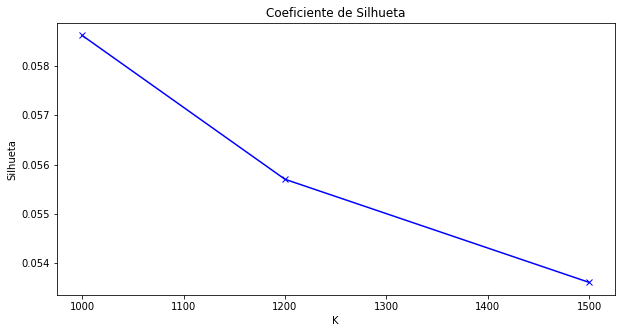

In [9]:
#Plots de gráficos
from plotter import plotter
plotdata=[]

plotdata = srt
plotdata = sorted(plotdata,key=lambda tup: tup[0])
plotk=[]
plots=[]
for i in plotdata:
    plotk.append(i[0])
    plots.append(i[1])
plotter.plot_silhouette(plotk,plots)